# Logistic Regression for sites_data_new(6x225)

# Load Packages<a class="anchor" id="Packages"></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.metrics import RocCurveDisplay, auc, roc_auc_score, make_scorer, f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.metrics import silhouette_score
from keras.optimizers import Adam
import random
import csv
import statistics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.utils.class_weight import compute_class_weight
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.metrics import average_precision_score

In [2]:
from joblib import load

default_lg = load('best_model/default_lg.joblib')

# Load Dataset<a class="anchor" id="Dataset"></a>

In [5]:
# df_raw = pd.read_csv('data/sites_data_new(6x225).csv')

In [2]:
# df_raw.fillna(0, inplace=True)
# riskforecasting = pd.read_csv('data/pollution_risk_forecasting.csv')
# df_merged_raw = pd.merge(df_raw, riskforecasting[['site', 'time', 'riskLevelLabel']], on=['site', 'time'])
# df_merged_raw

In [3]:
df_merged_raw = pd.read_csv('data/df_merged_raw.csv')
df_merged_raw

,Unnamed: 0,time,site,BBP_1,BBP_2,BBP_3,BBP_4,BBP_5,BBP_6,BBP_7,...,CHL_217,CHL_218,CHL_219,CHL_220,CHL_221,CHL_222,CHL_223,CHL_224,CHL_225,riskLevelLabel
0,0,2020-01-22,ukd4305-43260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
1,1,2020-02-17,ukk3106-27200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,2,2020-02-29,ukk4304-34200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.296514,0.000000,0.000000,0.000000,0.000000,0.000000,1
3,3,2020-03-01,ukk4305-25400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
4,4,2020-03-12,uke1200-08100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,5.998436,5.885504,5.679880,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187106,187106,2022-11-08,ukj3400-17700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
187107,187107,2022-12-02,ukk3103-29500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
187108,187108,2022-12-07,ukk3103-29100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,15.340636,15.438755,15.750604,15.151216,14.544814,13.733911,1
187109,187109,2022-12-08,ukk3103-29100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.141397,1.121911,1.060280,1.066033,1.071090,1.077519,0


In [18]:
counts_normalized = df_merged_raw['riskLevelLabel'].value_counts(normalize=True)
counts_normalized

0    0.971797
1    0.028203
Name: riskLevelLabel, dtype: float64

## Train Test Validation Split<a class="anchor" id="Train_Test_Validation_Split"></a>

In [4]:
train_labels_mean_zero = pd.read_csv('data/train_labels_mean_zero.csv')[['time', 'site']]
train_labels_mean_zero

,time,site
0,2021-05-25,ukk4305-25800
1,2022-07-04,ukk4305-25800
2,2022-08-08,ukk3105-31450
3,2022-08-27,ukk2206-20800
4,2020-06-08,uke1301-09020
...,...,...
112261,2021-07-19,ukj4210-12660
112262,2021-05-10,ukk4200-23200
112263,2020-08-10,ukk3104-33500
112264,2021-09-08,ukk1202-35700


In [5]:
test_labels_mean_zero = pd.read_csv('data/test_labels_mean_zero.csv')[['time', 'site']]
test_labels_mean_zero

,time,site
0,2022-09-21,ukk3106-32100
1,2020-08-08,ukh1407-10750
2,2020-09-20,ukd4200-42100
3,2022-07-06,ukk2206-20900
4,2021-08-24,ukk4305-26100
...,...,...
37418,2021-09-22,ukj2402-15680
37419,2021-08-14,ukk3104-33500
37420,2022-05-20,ukk4305-25600
37421,2022-06-25,ukj3400-18000


In [6]:
# Train test validation split
df_train = df_merged_raw.merge(train_labels_mean_zero, on=['time', 'site'], how='inner')
df_test = df_merged_raw.merge(test_labels_mean_zero, on=['time', 'site'], how='inner')

df_train.drop(['time', 'site'], axis=1, inplace=True)
df_test.drop(['time', 'site'], axis=1, inplace=True)

y_train = df_train.pop('riskLevelLabel')
y_test = df_test.pop('riskLevelLabel')

X_train = df_train
X_test = df_test

print('Training X Shape:', X_train.shape)
print('Training y Shape:', y_train.shape)
print('Testing X Shape:', X_test.shape)
print('Testing y Shape:', y_test.shape)

Training X Shape: (112266, 1351)
Training y Shape: (112266,)
Testing X Shape: (37423, 1351)
Testing y Shape: (37423,)


# Functions<a class="anchor" id="Functions"></a>

In [42]:
def pr_curve(model, X_test, y_test):
    y_pred = model.predict(X_test)
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    prc_auc = auc(recall, precision)
    fig, ax = plt.subplots()
    ax.plot(recall, precision, label='Precision recall curve (area = %0.2f)' % prc_auc)
    ax.axhline(y=counts_normalized[1], color='gray', linestyle='--', label='baseline')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.set_title('Precision-Recall Curve')
    ax.legend(loc="lower right")
    plt.show()
    return fig

In [53]:
def plot_roc(model, X_test, y_test):
    y_pred = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    fig, ax = plt.subplots()
    ax.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Curve')
    ax.legend(loc="lower right")
    plt.show()
    return fig

In [58]:
def cm(model,X_test,y_test):
    cm = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    cm.plot
    # plt.savefig('results/CM_mean_15x15_lg_PCA.png')

In [7]:
def save_result(model,X_test,y_test):
    y_pred = model.predict(X_test)
    ACC = accuracy_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    AUC_ROC = auc(fpr, tpr)
    PRE = precision_score(y_test, y_pred)
    REC = recall_score(y_test, y_pred)
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    AP = average_precision_score(y_test, y_pred)
    #AUC_PRC = auc(recall, precision)
    F1 = f1_score(y_test, y_pred)
    return ACC, AUC_ROC, PRE, REC, AP, F1

# Default Logistic

In [13]:
def default_lg(X_train, y_train):
    lg = LogisticRegression(random_state = 100, solver = 'saga', class_weight = 'balanced', n_jobs = -1)
    lg.fit(X_train, y_train)
    return lg

In [14]:
default_lg = default_lg(X_train, y_train)

C:\ANACONDA\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [16]:
from joblib import dump

dump(default_lg, 'best_model/default_lg.joblib')

['best_model/default_lg.joblib']

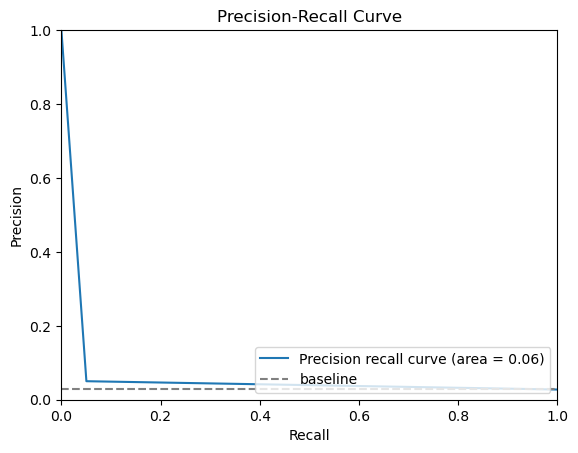

In [46]:
pr_curve = pr_curve(default_lg, X_test, y_test)

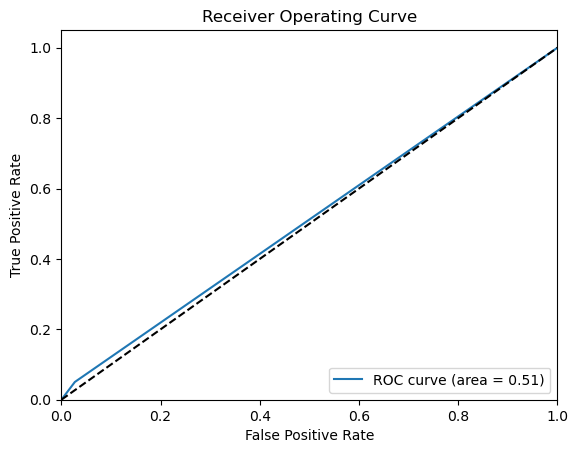

In [54]:
roc_lg = plot_roc(default_lg, X_test, y_test)

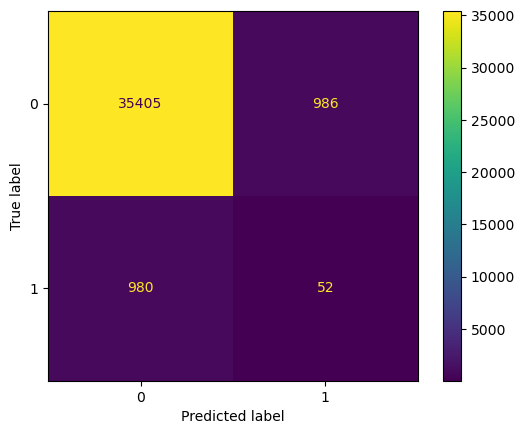

In [59]:
cm(default_lg,X_test,y_test)

In [8]:
results_df_lg = pd.DataFrame([['Logistic Regression', '6x225', *save_result(default_lg,X_test,y_test)]],
                             columns=['Model', 'Sub-Model', 'Accuracy', 'AUC_ROC','Precision','Recall', 'AP', 'f1 score'])
results_df_lg

,Model,Sub-Model,Accuracy,AUC_ROC,Precision,Recall,AP,f1 score
0,Logistic Regression,6x225,0.947465,0.511646,0.050096,0.050388,0.028711,0.050242


In [56]:
results_df_lg.to_csv('results/default_lg.csv')